<center><b style="font-size:40px"> Gender Recognition by Voice</b></center>
<img src="banner.jpeg" alt="banner" border="0" ></a> <!-- width="950px" height="500px" -->

<a id=section0></a>
## Table Of Contents
1. [Description](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Data Loading](#section3)<br>
4. [Missing Value identification](#section4)<br>
5. [Outliers](#section5)<br>
6. [Distribution of target variable](#section6)<br>
7. [Data Visualization](#section7)<br>
8. [Visual Representation of audio clip](#section8)<br>
9. [Label encoding of target variable](#section9)<br>
10. [Corelation](#section10)<br>
11. [Helper Functions](#section11)<br>
12. [Data Scaling](#section12)<br>
13. [2D visualization of high dimensional data using TSNE](#section13)<br>
14. [Dimensionality Reduction using PCA](#section14)<br>
15. [Models](#section15)<br>
	- 15.1 [Decision Tree Classifier](#section1501)<br>
	- 15.2 [Random Forest Classifier](#section1502)<br>
	- 15.3 [Gradient Boost Classifier](#section1503)<br>
	- 15.4 [Support vector classifier](#section1504)<br>
	- 15.5 [Neural Network (Sklearn)](#section1505)<br>
	- 15.6 [ROC Curve (all models)](#section1506)<br>
	- 15.7 [Neural Network](#section1507)<br>
16. [Conclusion](#section16)<br>
17. [Live Demo](#section17)<br>
18. [Appendix](#section18)<br>

## 1. Description<a id=section1></a>

Gender Recognition by Voice and Speech Analysis

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).

The Dataset
The following acoustic properties of each voice are measured and included within the CSV:
- meanfreq: mean frequency (in kHz)
- sd: standard deviation of frequency
- median: median frequency (in kHz)
- Q25: first quantile (in kHz)
- Q75: third quantile (in kHz)
- IQR: interquantile range (in kHz)
- skew: skewness (see note in specprop description)
- kurt: kurtosis (see note in specprop description)
- sp.ent: spectral entropy
- sfm: spectral flatness
- mode: mode frequency
- centroid: frequency centroid (see specprop)
- peakf: peak frequency (frequency with highest energy)
- meanfun: average of fundamental frequency measured across acoustic signal
- minfun: minimum fundamental frequency measured across acoustic signal
- maxfun: maximum fundamental frequency measured across acoustic signal
- meandom: average of dominant frequency measured across acoustic signal
- mindom: minimum of dominant frequency measured across acoustic signal
- maxdom: maximum of dominant frequency measured across acoustic signal
- dfrange: range of dominant frequency measured across acoustic signal
- modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
- label: male or female

According to a CART model, it appears that looking at the mean fundamental frequency might be enough to accurately classify a voice. However, some male voices use a higher frequency, even though their resonance differs from female voices, and may be incorrectly classified as female. To the human ear, there is apparently more than simple frequency, that determines a voice's gender.

#### Questions
- What other features differ between male and female voices?
- Can we find a difference in resonance between male and female voices?
- Can we identify falsetto from regular voices? (separate data-set likely needed for this)
- Are there other interesting features in the data?

## 2. Import Packages<a id=section2></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

C:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 3. Data Loading<a id=section3></a>

In [2]:
dataPath = 'https://raw.githubusercontent.com/insaid2018/Term-3/master/Projects/gender_recognition_by_voice.csv'
dataset = pd.read_csv(dataPath)
dataset.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


## 4. Missing Value identification<a id=section4></a>

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

- From above we can say that there are no missing values.
- Generally in realworld dataset, there will be missing values.

## 5. Outliers<a id=section5></a>

In [4]:
dataset.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


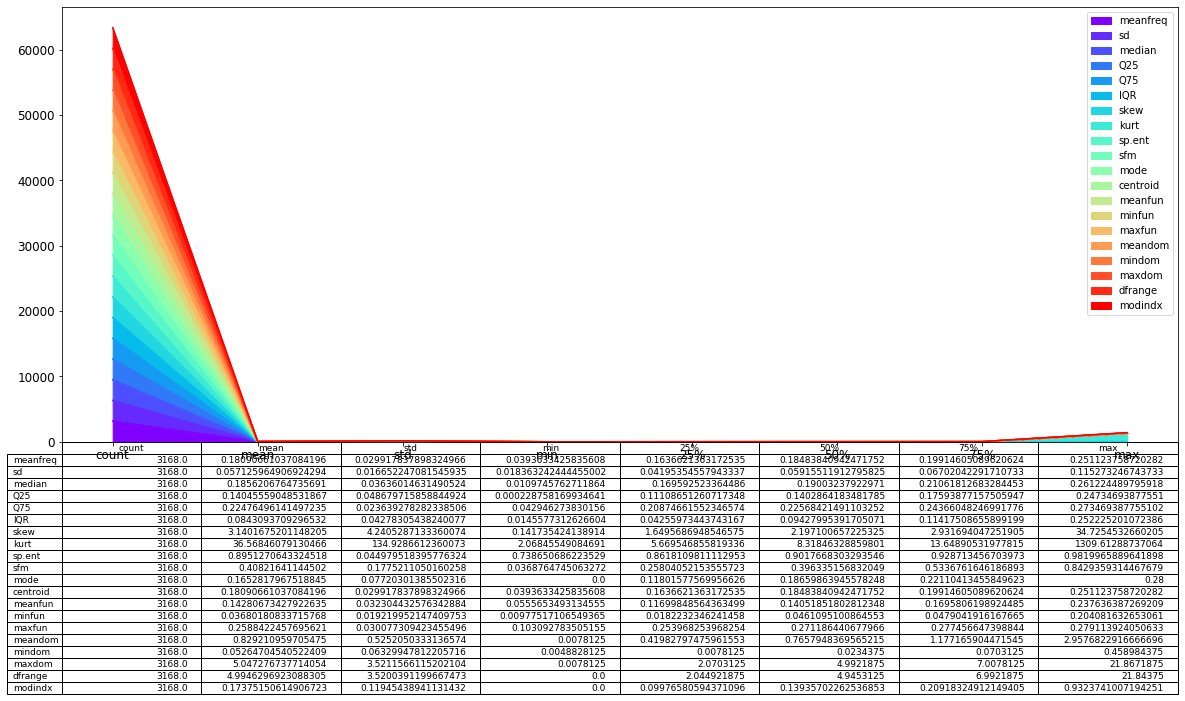

In [5]:
dataset.describe().plot(kind = "area", fontsize=12, figsize = (20,8), table = True,colormap="rainbow")

In [6]:
Q3 = dataset.describe().loc['75%', :]
Q1 = dataset.describe().loc['25%', :]

iqr = Q3 - Q1
iqr

meanfreq    0.035484
sd          0.025067
median      0.041026
Q25         0.064852
Q75         0.034914
IQR         0.071615
skew        1.282125
kurt        7.979358
sp.ent      0.066902
sfm         0.275636
mode        0.103088
centroid    0.035484
meanfun     0.052582
minfun      0.029681
maxfun      0.023488
meandom     0.757338
mindom      0.062500
maxdom      4.937500
dfrange     4.947266
modindx     0.109417
dtype: float64

In [7]:
for featurename in dataset.columns.drop('label'):    
    length = len(dataset[dataset[featurename] < (Q1[featurename] - (iqr[featurename]*1.5))])
    if length > 0:
        print("Count = {}, Q1={}, LowerLimit={}".format(length, Q1[featurename],(Q1[featurename] - (iqr[featurename]*1.5))))
#         print(dataset[dataset[featurename] < (Q1[featurename] - (iqr[featurename]*1.5))][featurename])
#         print("*"*50)

Count = 64, Q1=0.1636621363172535, LowerLimit=0.11043626444882436
Count = 109, Q1=0.169592523364486, LowerLimit=0.10805411816194818
Count = 33, Q1=0.11108651260717348, LowerLimit=0.013808124155344492
Count = 27, Q1=0.20874661552346574, LowerLimit=0.15637581510378773
Count = 6, Q1=0.8618109811112953, LowerLimit=0.7614572677222787
Count = 64, Q1=0.1636621363172535, LowerLimit=0.11043626444882436
Count = 313, Q1=0.253968253968254, LowerLimit=0.218735663822369


In [8]:
for featurename in dataset.columns.drop('label'):    
    length = len(dataset[dataset[featurename] > (Q3[featurename] + iqr[featurename]*1.5)])
    if length > 0:
        print("Count = {}, Q3={}, UpperLimit={}".format(length, Q3[featurename],(Q3[featurename] + iqr[featurename]*1.5)))
#         print(dataset[dataset[featurename] > (Q3[featurename] + iqr[featurename]*1.5)][featurename])
#         print("*"*50)

Count = 10, Q3=0.06702042291710733, UpperLimit=0.10462073892361827
Count = 10, Q3=0.11417508655899199, UpperLimit=0.22159811474133245
Count = 230, Q3=2.931694047251905, UpperLimit=4.854882075847776
Count = 332, Q3=13.64890531977815, UpperLimit=25.61794301571637
Count = 38, Q3=0.0479041916167665, UpperLimit=0.09242562710569754
Count = 19, Q3=1.177165904471545, UpperLimit=2.3131727990394393
Count = 275, Q3=0.0703125, UpperLimit=0.1640625
Count = 42, Q3=7.0078125, UpperLimit=14.4140625
Count = 42, Q3=6.9921875, UpperLimit=14.4130859375
Count = 208, Q3=0.20918324912149405, UpperLimit=0.3733094138881687


In [9]:
p = 99.5
for featurename in dataset.columns.drop('label'): 
    length = len(dataset[dataset[featurename] > np.percentile(dataset[featurename], p)])
    if length > 0:
        print(featurename, "Count=", length, "Percentile=", np.percentile(dataset[featurename], p))

meanfreq Count= 16 Percentile= 0.24051497784221695
sd Count= 16 Percentile= 0.09648519967877067
median Count= 16 Percentile= 0.25109194360543613
Q25 Count= 16 Percentile= 0.23203271028037334
Q75 Count= 16 Percentile= 0.2663176174965974
IQR Count= 16 Percentile= 0.19967510397216098
skew Count= 16 Percentile= 29.50281929184381
kurt Count= 16 Percentile= 975.2342943443182
sp.ent Count= 16 Percentile= 0.9744350628394818
sfm Count= 16 Percentile= 0.7987883748136467
mode Count= 16 Percentile= 0.2788362300501593
centroid Count= 16 Percentile= 0.24051497784221695
meanfun Count= 16 Percentile= 0.2148250712129284
minfun Count= 16 Percentile= 0.1315081967213117
maxfun Count= 6 Percentile= 0.27906976744186
meandom Count= 16 Percentile= 2.408914896487445
mindom Count= 12 Percentile= 0.2421875
maxdom Count= 16 Percentile= 18.859218749999997
dfrange Count= 16 Percentile= 18.835781249999997
modindx Count= 16 Percentile= 0.7186076230339931


- From above there are outliers in the data. But will keep them as it is for now and handle later.

## 6. Distribution of target variable<a id=section6></a>

male 1584
female 1584


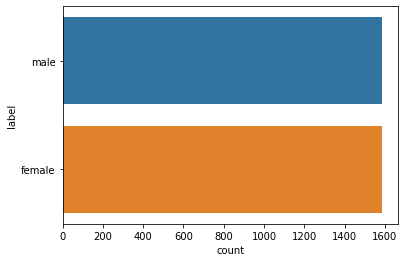

In [10]:
print('male', len(dataset[dataset.label == 'male']))
print('female', len(dataset[dataset.label == 'female']))
_ = sns.countplot(y='label', data=dataset)

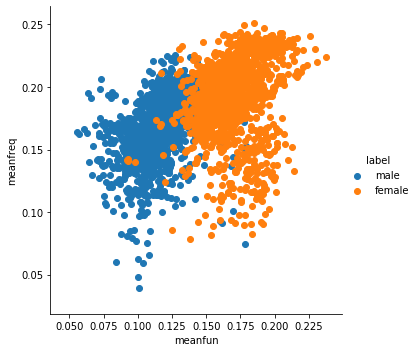

In [11]:
sns.FacetGrid(dataset, hue="label", size=5)\
   .map(plt.scatter, "meanfun", "meanfreq")\
   .add_legend()
plt.show()

- The target variable for this classification is "label" column
- These two categories ("male", "female") are just half and half. It seems no imbalance in this data set.

In [12]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(dataset, title='Pandas Profiling Report')
# profile.to_file(output_file="pre_output.html")

In [13]:
drop_features = ['dfrange','centroid','median','Q25','skew']
all_features = dataset.columns.to_list()
important_features = list(set(all_features) - set(drop_features))

if 'label' in important_features:
    important_features.remove('label')
print(important_features, len(important_features))

['IQR', 'meanfreq', 'maxdom', 'Q75', 'maxfun', 'mindom', 'sp.ent', 'meandom', 'mode', 'sd', 'sfm', 'modindx', 'kurt', 'minfun', 'meanfun'] 15


In [14]:
print(len(dataset))
dataset.drop_duplicates(subset=important_features, keep='first', inplace=True)
print(len(dataset))

3168
3166


In [15]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(dataset[important_features], title='Pandas Profiling Report')
# profile.to_file(output_file="post_output.html")

## 7. Data Visualization<a id=section7></a>

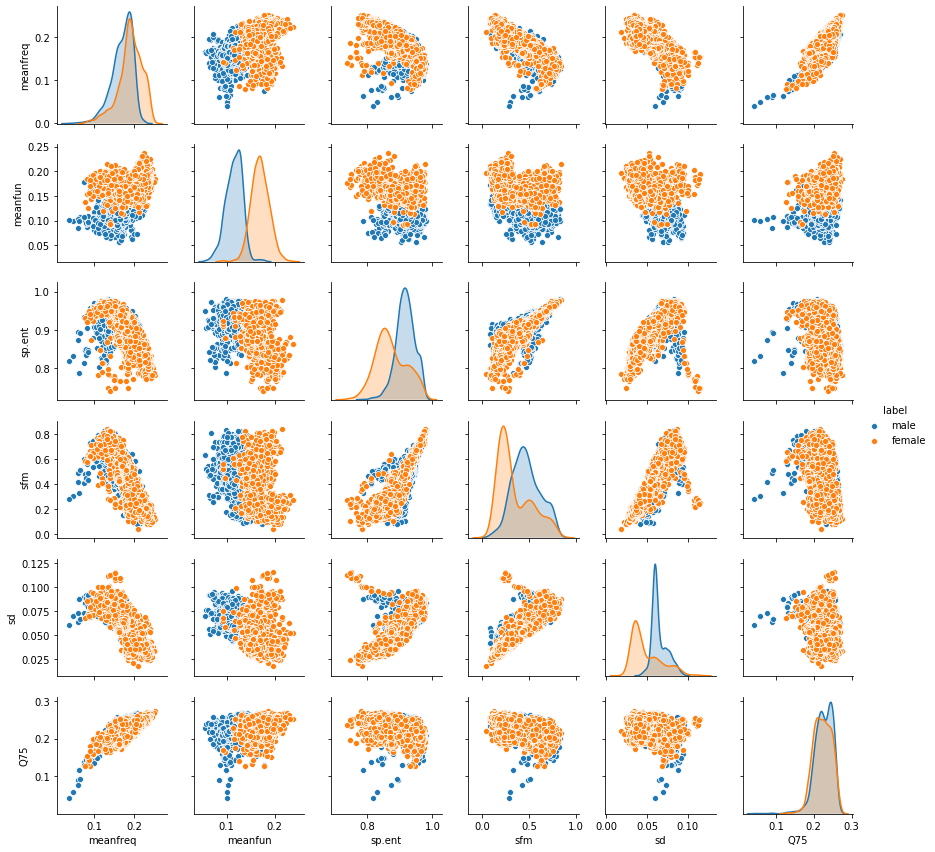

In [16]:
_ = sns.pairplot(dataset[['meanfreq', 'meanfun', 'sp.ent', 'sfm', 'sd', 'Q75', 'label']], 
                 hue='label', size=2)

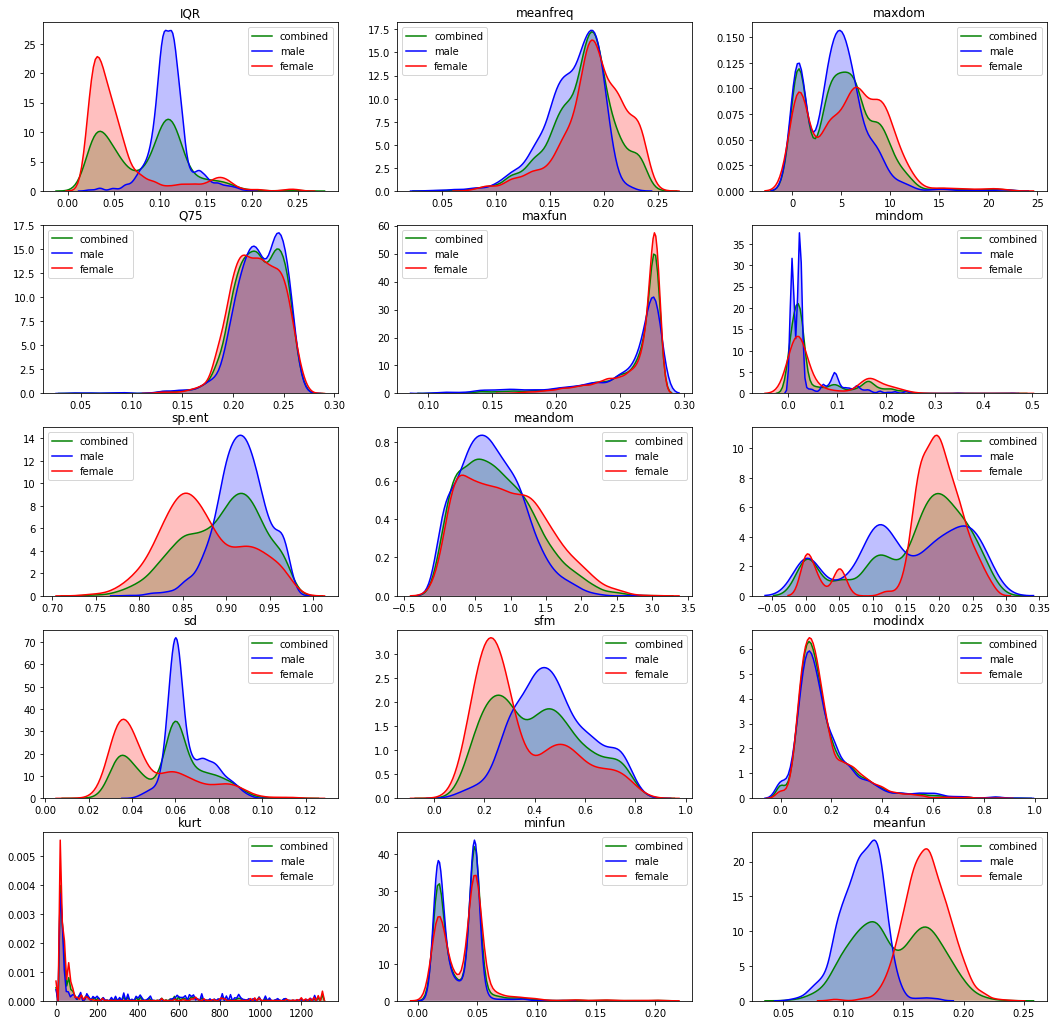

In [17]:
fig, ax = plt.subplots(5, 3, figsize=(18,18))
axes = ax.ravel()
# for i, col in enumerate(dataset.columns.drop('label')):
for i, col in enumerate(important_features):
    sns.kdeplot(data=dataset[col], color='g', shade=True, Label='combined', ax=axes[i])
    sns.kdeplot(data=dataset[dataset.label == 'male'][col], color='b', shade=True, Label='male', ax=axes[i])
    sns.kdeplot(data=dataset[dataset.label == 'female'][col], color='r', shade=True, Label='female', ax=axes[i])
    axes[i].set_title(col)

- These information can be useful to select features to be used for training model.
- The above plot shows that for all features, there is a bit of overlap between the values for the data that is labelled male and female.

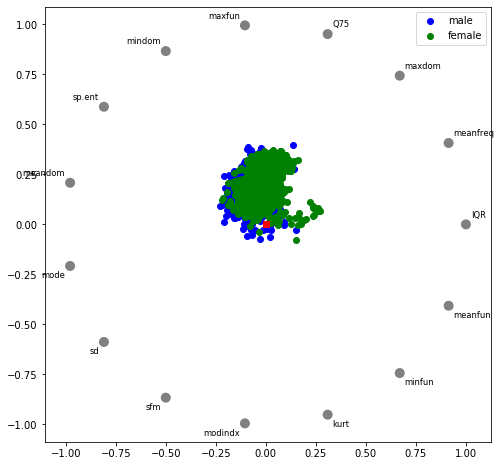

In [18]:
#Good to compare every feature
from pandas.plotting import radviz
# plt.figure(1, figsize=(10,6))
fig, ax = plt.subplots(figsize=(8,8))

# Instantiate the visualizer

radviz(dataset[list(important_features) + ['label']], "label", color=['blue', 'green'], ax=ax)
ax.plot(range(1), linestyle='--', marker='s', color='r')

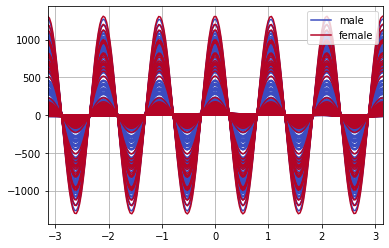

In [19]:
from pandas.plotting import andrews_curves
andrews_curves(dataset[list(important_features) + ['label']],"label",colormap='coolwarm')
plt.show()
plt.ioff()

## 8. Visual Representation of audio clip<a id=section8></a>

Text(0, 0.5, 'Amplitude')

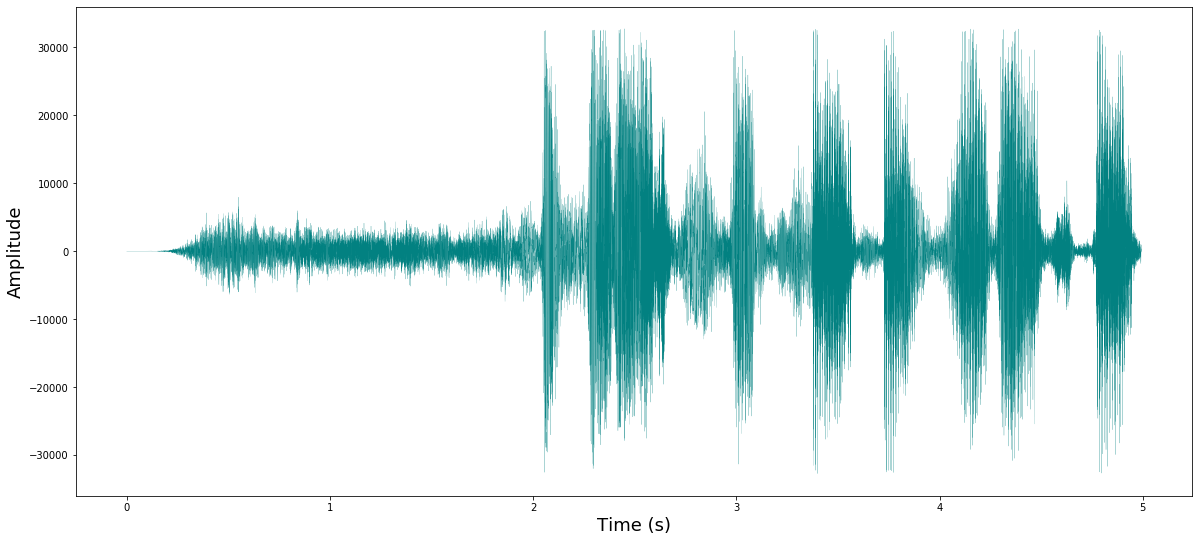

In [20]:
from scipy.io import wavfile
wav_file = 'sounds/test_audio.wav'
rate, data = wavfile.read(wav_file)

time = np.arange(0, float(data.shape[0]), 1) / rate
plt.figure(1, figsize=(20,9))
plt.subplot(111)
plt.plot(time, data, linewidth=0.1, alpha=0.9, color='teal') #
plt.xlabel('Time (s)', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)
# plt.grid()

## 9. Label encoding of target variable<a id=section9></a>

In [21]:
# Label encode "Male = 0, Female = 1"
dataset.loc[:,'label'][dataset['label']=="male"] = 0
dataset.loc[:,'label'][dataset['label']=="female"] = 1
dataset.label = dataset.label.astype(int)

## 10. Corelation<a id=section10></a>

Text(0.5, 1, 'Co-relation Matrix')

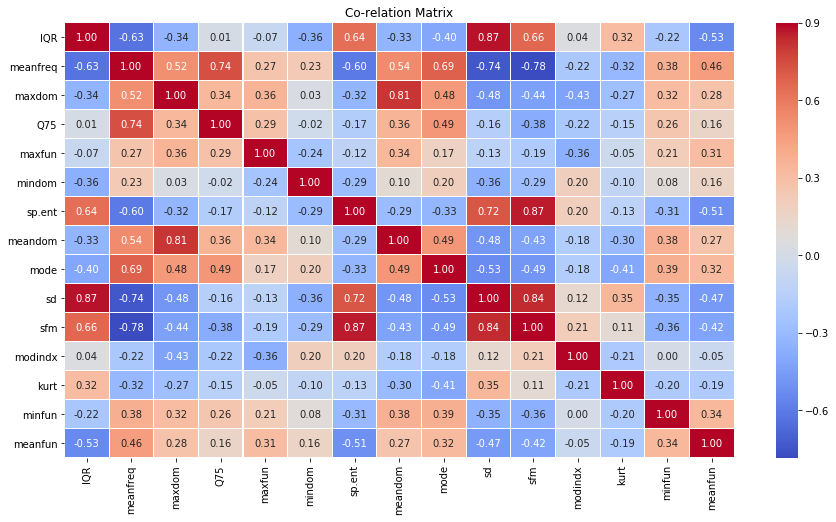

In [22]:
target = 'label'

# lis = list(important_features) + ['label']
corr = dataset[important_features].corr()
# corr_abs = corr.abs()

# nr_num_cols = len(list(dataset.columns.drop('label')))

# cols = corr_abs.nlargest(nr_num_cols, target)[target].index
# cm = np.corrcoef(dataset[cols].T)

# # Generate a mask for the upper triangle (taken from seaborn example gallery)
# mask = np.zeros_like(cm, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15,8))
_hm = sns.heatmap(corr, annot=True, cmap = 'coolwarm', vmax=.9, linecolor='white', linewidths=.1,
                 fmt='.2f', annot_kws={'size': 10}, yticklabels=important_features, xticklabels=important_features)
plt.title('Co-relation Matrix')

In [23]:
# map features to their absolute correlation values
lis = list(important_features) + ['label']
corr = dataset[lis].corr().abs()
# corr = dataset.corr().abs()

# set equality (self correlation) as zero
corr[corr == 1] = 0

# of each feature, find the max correlation
# and sort the resulting array in ascending order
corr_cols = corr.max().sort_values(ascending=False)

# display the highly correlated features
display(corr_cols[corr_cols > 0.7])
corr_cols[corr_cols > 0.7].index

sd          0.874713
IQR         0.874713
sfm         0.866491
sp.ent      0.866491
label       0.834135
meanfun     0.834135
meandom     0.812580
maxdom      0.812580
meanfreq    0.784256
Q75         0.740809
dtype: float64

Index(['sd', 'IQR', 'sfm', 'sp.ent', 'label', 'meanfun', 'meandom', 'maxdom',
       'meanfreq', 'Q75'],
      dtype='object')

In [24]:
# from yellowbrick.features.radviz import radviz
# from yellowbrick.datasets import load_occupancy

# # Specify the target classes
# classes = ["male", "female"]

# fig, ax = plt.subplots(figsize=(8,8))

# # Instantiate the visualizer
# ax.plot(range(1), linestyle='--', marker='s', color='r')
# # radviz(dataset[dataset.columns.drop('label')], dataset.label, classes=classes, ax=ax)
# radviz(dataset[important_features], dataset.label, classes=classes, ax=ax)

Looks like there are some highly correlated features. 

This dataset intially had 20 features. Lets go ahead and do some PCA to determine how many dimensions we can reduce it by

## 11. Helper Functions<a id=section11></a>

In [25]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

#Plot the variable importance
def plot_feature_importances(model, cols):
    n_features = trainX.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cols)
    plt.xlabel("Variable importance")
    plt.ylabel("Independent Variable")
    plt.title(type(model).__name__)
    plt.show()
    
    df = pd.DataFrame([model.feature_importances_, cols]).T
    df.columns = ['Importance', 'Feature']
    
def plot_confusion_matrix(X, labels, model):
    cm = confusion_matrix(labels, model.predict(X))
    cr = classification_report(labels, model.predict(X))
    print(cr)
    sns.heatmap(cm, annot=True, fmt='.2f')
    plt.show()
    
def plot_roc_curves(model, x, y):
    cv = StratifiedKFold(n_splits=5,shuffle=False)
#     tree = DecisionTreeClassifier(random_state=0)

    # plot arrows
    fig1 = plt.figure(figsize=[8,12])
    ax1 = fig1.add_subplot(111,aspect = 'equal')
    ax1.add_patch(
        patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5) )
    ax1.add_patch(
        patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5) )

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0,1,100)
    i = 1
    for train,test in cv.split(x,y):
        prediction = model.fit(x[train],y[train]).predict_proba(x[test])
        fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        i= i+1


    plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='blue',
             label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.text(0.32,0.7,'More accurate area',fontsize = 12)
    plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
    plt.grid()
    plt.show()

def plot_learning_curve(model, xtrain, ytrain):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                           X=xtrain,
                                                           y=ytrain,
                                                           train_sizes=np.linspace(0.1, 1.0, 10),
                                                           cv=10)

    # Mean value of accuracy against training data
    train_mean = np.mean(train_scores, axis=1)

    # Standard deviation of training accuracy per number of training samples
    train_std = np.std(train_scores, axis=1)

    # Same as above for test data
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot training accuracies 
    plt.plot(train_sizes, train_mean, color='red', marker='o', label='Training Accuracy')
    # Plot the variance of training accuracies
    plt.fill_between(train_sizes,
                    train_mean + train_std,
                    train_mean - train_std,
                    alpha=0.15, color='red')

    # Plot for test data as training data
    plt.plot(train_sizes, test_mean, color='blue', linestyle='--', marker='s', 
            label='Test Accuracy')
    plt.fill_between(train_sizes,
                    test_mean + test_std,
                    test_mean - test_std,
                    alpha=0.15, color='blue')

    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()  
    
def plot_validation_curve(model, xtrain, ytrain, parameter_name):
    param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
    train_scores, test_scores = validation_curve(estimator=model,
                                                 X=xtrain,
                                                 y=ytrain,
                                                 param_name=parameter_name,
                                                 param_range=param_range,
                                                 cv=10)

    # Mean value of accuracy against training data
    train_mean = np.mean(train_scores, axis=1)

    # Standard deviation of training accuracy per number of training samples
    train_std = np.std(train_scores, axis=1)

    # Same as above for test data
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot training accuracies 
    plt.plot(param_range, train_mean, color='red', marker='o', label='Training Accuracy')
    # Plot the variance of training accuracies
    plt.fill_between(param_range,
                    train_mean + train_std,
                    train_mean - train_std,
                    alpha=0.15, color='red')

    # Plot for test data as training data
    plt.plot(param_range, test_mean, color='blue', linestyle='--', marker='s', 
            label='Test Accuracy')
    plt.fill_between(param_range,
                    test_mean + test_std,
                    test_mean - test_std,
                    alpha=0.15, color='blue')

    plt.xscale('log')
    plt.xlabel('Regularization parameter C')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()     

### Baseline

Train shape (2532, 1) (2532,)
Test shape (634, 1) (634,)
LogisticRegression

Accuracy on training set: 0.565
Accuracy on test set: 0.576
              precision    recall  f1-score   support

           0       0.59      0.61      0.60       333
           1       0.55      0.54      0.55       301

    accuracy                           0.58       634
   macro avg       0.57      0.57      0.57       634
weighted avg       0.58      0.58      0.58       634



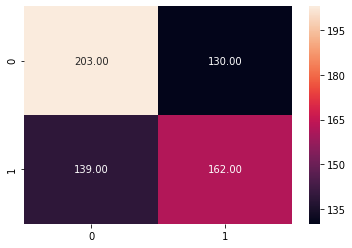

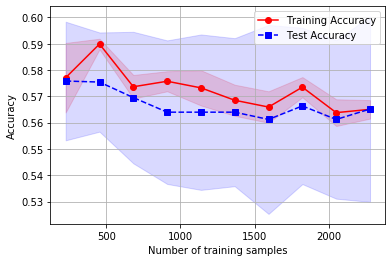

In [26]:
from sklearn.model_selection import train_test_split

trainX, testX, train_labels, test_labels = train_test_split(dataset['meandom'], dataset['label'], 
                                                            random_state=0, test_size=.2)
trainX = np.array(trainX).reshape(-1,1)
testX = np.array(testX).reshape(-1,1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(trainX)

trainX = scaler.transform(trainX)
testX = scaler.transform(testX)

print('Train shape', np.array(trainX).shape, np.array(train_labels).shape)
print('Test shape', np.array(testX).shape, np.array(test_labels).shape)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches
logreg = LogisticRegression()

logreg = logreg.fit(trainX, train_labels)
print("LogisticRegression\n")
print("Accuracy on training set: {:.3f}".format(logreg.score(trainX, train_labels)))
print("Accuracy on test set: {:.3f}".format(logreg.score(testX, test_labels)))

# logreg.predict_proba(testX)
plot_confusion_matrix(testX, test_labels, logreg)
# plot_roc_curves(logreg, trainX.astype(int), train_labels) 
plot_learning_curve(logreg, trainX, train_labels)

### Full Regression Baseline

Full LogisticRegression

Accuracy on training set: 0.975
Accuracy on test set: 0.973
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       333
           1       0.98      0.96      0.97       301

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



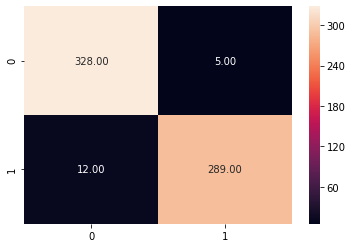

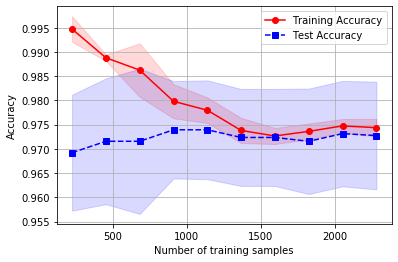

In [27]:
from sklearn.model_selection import train_test_split

features = dataset.columns.drop('label')
trainX, testX, train_labels, test_labels = train_test_split(dataset[features], dataset['label'], 
                                                            random_state=0, test_size=.2)
# trainX = np.array(trainX).reshape(-1,1)
# testX = np.array(testX).reshape(-1,1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(trainX)

trainX = scaler.transform(trainX)
testX = scaler.transform(testX)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches
logreg = LogisticRegression()

logreg = logreg.fit(trainX, train_labels)
print("Full LogisticRegression\n")
print("Accuracy on training set: {:.3f}".format(logreg.score(trainX, train_labels)))
print("Accuracy on test set: {:.3f}".format(logreg.score(testX, test_labels)))

# logreg.predict_proba(testX)
plot_confusion_matrix(testX, test_labels, logreg)
# plot_roc_curves(logreg, trainX.astype(int), train_labels) 
plot_learning_curve(logreg, trainX, train_labels)

## Importing sklearn model libraries

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches
from sklearn.metrics import roc_curve,auc
from scipy import interp
import pickle

## 12. Data Scaling<a id=section12></a>

In [29]:
x = dataset[important_features].iloc[:, :].values
# y = dataset[important_features].iloc[:,-1].values
y = dataset.label.values

print(x.shape)
final_scaler = StandardScaler()
x = final_scaler.fit_transform(x)

# save final_scaler
filename = 'saved_models/final_scaler.sav'
pickle.dump(final_scaler, open(filename, 'wb'))

(3166, 15)


1 0.4062634387805378
2 0.5423410468451999
3 0.64196020811141
4 0.7133390658835903
5 0.7780611236184514
6 0.8313666828557339
7 0.8737071863541471
8 0.9109365270194443
9 0.9419516540069097
10 0.9651694662436511
11 0.981196533368803
12 0.9902184809666295
13 0.996092321205464
14 0.9990664999722197


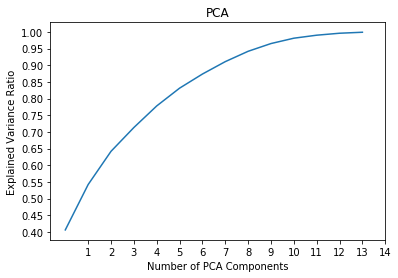

In [30]:
var_explain = []
xtic = []
for i in range(1, 15):
    pca = PCA(n_components= i, )
    x_pca = pca.fit_transform(x)
    var_explain.append(np.sum(pca.explained_variance_ratio_))
    xtic.append(i)
    print(i, np.sum(pca.explained_variance_ratio_))

plt.plot(var_explain[:])
plt.xlabel('Number of PCA Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA')
plt.yticks(np.arange(.4,1.05,.05))
# plt.xticks(np.arange(0,16,2))
plt.xticks(xtic)
# plt.grid()
plt.show()

## 13. 2D visualization of high dimensional data using TSNE<a id=section13></a>

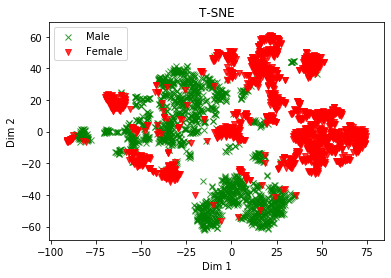

In [31]:
# TSNE Representation that already splits female from male
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', random_state=0)
X_t = tsne.fit_transform(x, y)

# print(X_t)

male_indexes=[]
female_indexes=[]
for i in range(len(y)):
    if y[i] == 0:
        male_indexes.append(True)
    else:
        male_indexes.append(False)

for i in range(len(y)):
    if y[i] == 1:
        female_indexes.append(True)
    else:
        female_indexes.append(False)

# print(male_indexes)        
# print(female_indexes)        
plt.figure()
plt.scatter(X_t[male_indexes, 0],
                   X_t[male_indexes, 1], #np.where(train_labels == 0)
                   marker='x', color='g',
                   linewidth='1', alpha=0.8, label='Male')
plt.scatter(X_t[female_indexes, 0],
                   X_t[female_indexes, 1],
                   marker='v', color='r',
                   linewidth='1', alpha=0.8, label='Female')

plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.title('T-SNE')
plt.legend(loc='best')
plt.savefig('1.png')
plt.show() 

## 14. Dimensionality Reduction using PCA<a id=section14></a>

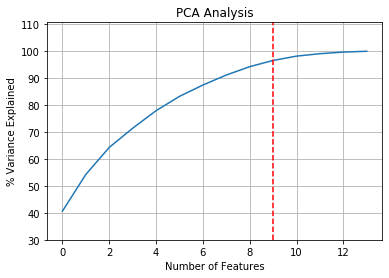

In [32]:
pca = PCA(.999).fit(x)
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.ylim(30,110.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)
plt.grid()
plt.axvline(x=9, color='r', linestyle = '--')
plt.show()

In [33]:
# save x before pca
filename = 'saved_models/x_without_pca.sav'
pickle.dump(x, open(filename, 'wb'))

In [34]:
num_of_features_to_use = 9

In [35]:
pca = PCA(n_components= num_of_features_to_use, random_state = 0)
pca.fit(x)
x = pca.transform(x)
print(x.shape)

(3166, 9)


In [36]:
# save x after pca
filename = 'saved_models/x_after_pca.sav'
pickle.dump(x, open(filename, 'wb'))

In [37]:
# save y 
filename = 'saved_models/y.sav'
pickle.dump(y, open(filename, 'wb'))

# save pca
filename = 'saved_models/pca.sav'
pickle.dump(pca, open(filename, 'wb'))

In [38]:
# Split data in 80-20 proportion and scale the data
trainX, testX, train_labels, test_labels = train_test_split(x, y, test_size=0.2, random_state=42)

sumary = {}

## 15. Models <a id=section15></a>
### 15.1 Decision Tree Classifier<a id=section1501></a>

Decision Tree
Accuracy on training set: 1.000
Accuracy on test set: 0.924
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       332
           1       0.91      0.93      0.92       302

    accuracy                           0.92       634
   macro avg       0.92      0.92      0.92       634
weighted avg       0.92      0.92      0.92       634



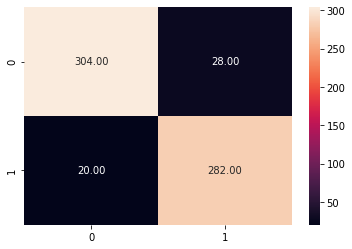

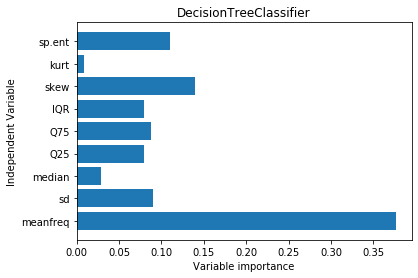

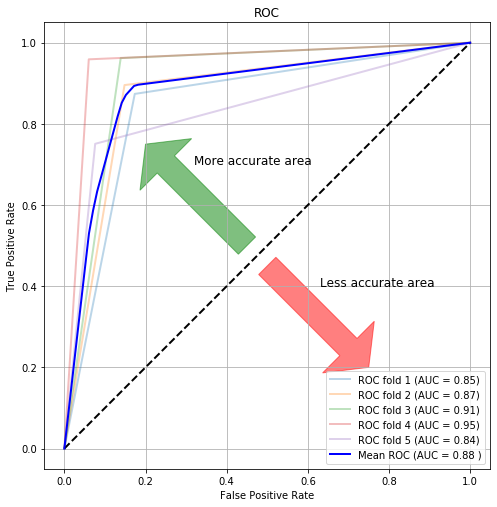

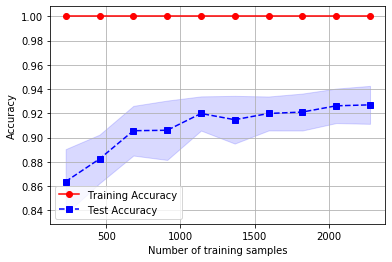

In [39]:
# Decision Tree
tree = DecisionTreeClassifier(random_state=0).fit(trainX, train_labels)
print("Decision Tree")
testScore = tree.score(testX, test_labels)
trainScore = tree.score(trainX, train_labels)
sumary['DecisionTreeClassifier'] = {'Train Acc':trainScore, 'Test Acc':testScore}
print("Accuracy on training set: {:.3f}".format(trainScore))
print("Accuracy on test set: {:.3f}".format(testScore))

plot_confusion_matrix(testX, test_labels, tree)
plot_feature_importances(tree, list(dataset.columns.drop('label')))
plot_roc_curves(tree, x, y) 
plot_learning_curve(tree, trainX, train_labels)
# plot_validation_curve(tree, trainX, train_labels, 'criterion')

# save model
filename = 'saved_models/DecisionTreeClassifier.sav'
pickle.dump(tree, open(filename, 'wb'))

### 15.2 Random Forest Classifier<a id=section1502></a>

Random Forests
Accuracy on training set: 0.996
Accuracy on test set: 0.948
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       332
           1       0.94      0.95      0.95       302

    accuracy                           0.95       634
   macro avg       0.95      0.95      0.95       634
weighted avg       0.95      0.95      0.95       634



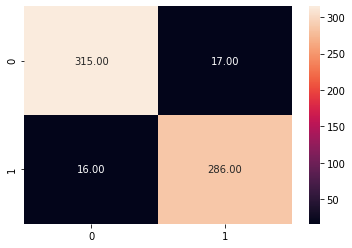

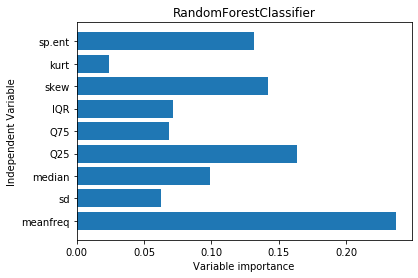

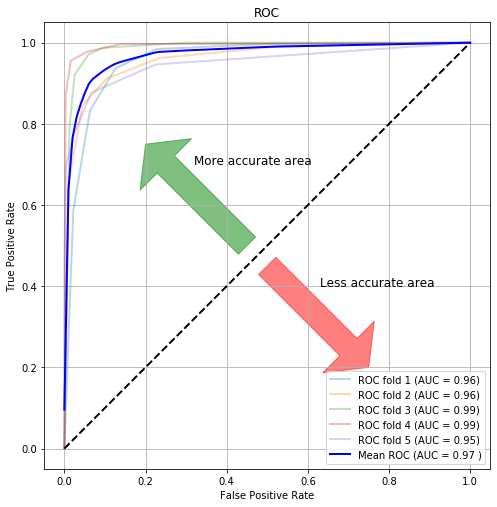

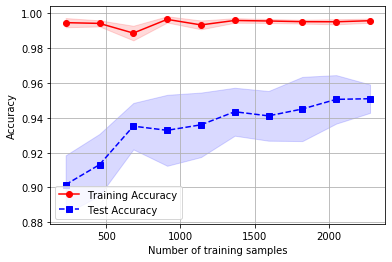

In [40]:
# Random forest
forest = RandomForestClassifier(n_estimators=5, random_state=0).fit(trainX, train_labels)
print("Random Forests")
# print("Accuracy on training set: {:.3f}".format(forest.score(trainX, train_labels)))
# print("Accuracy on test set: {:.3f}".format(forest.score(testX, test_labels)))

testScore = forest.score(testX, test_labels)
trainScore = forest.score(trainX, train_labels)
sumary['RandomForestClassifier'] = {'Train Acc':trainScore, 'Test Acc':testScore}
print("Accuracy on training set: {:.3f}".format(trainScore))
print("Accuracy on test set: {:.3f}".format(testScore))

plot_confusion_matrix(testX, test_labels, forest)
plot_feature_importances(forest, list(dataset.columns.drop('label')))
plot_roc_curves(forest, x, y) 
plot_learning_curve(forest, trainX, train_labels)
# plot_validation_curve(forest, trainX, train_labels, 'criterion')

# sumary['RandomForestClassifier'] = {'Train Acc':forest.score(trainX, train_labels), 'Test Acc':forest.score(testX, test_labels)}

# save model
filename = 'saved_models/RandomForestClassifier.sav'
pickle.dump(forest, open(filename, 'wb'))

### 15.3 Gradient Boost Classifier<a id=section1503></a>

Gradient Boosting
Accuracy on training set: 0.992
Accuracy on test set: 0.965
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       332
           1       0.97      0.96      0.96       302

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



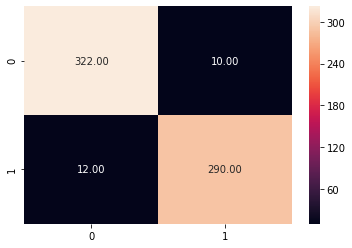

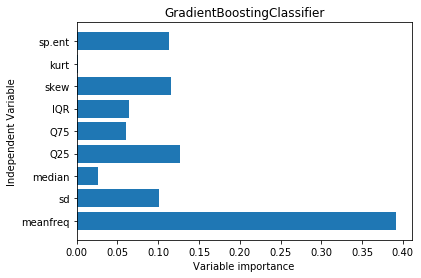

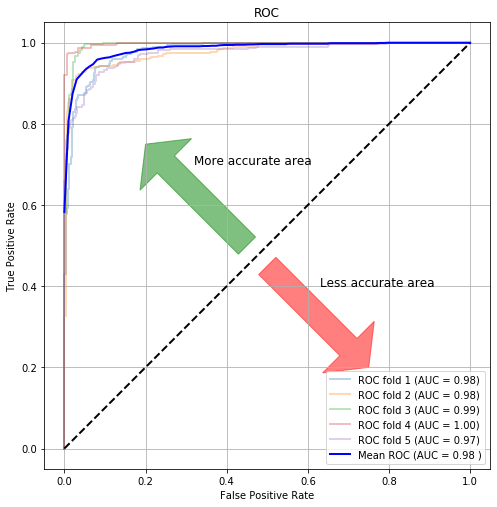

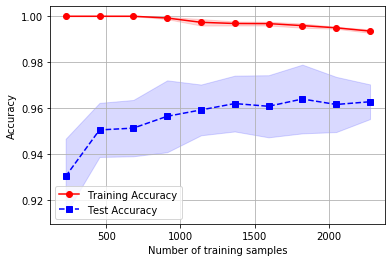

In [41]:
# Gradient boost
grboost = GradientBoostingClassifier(random_state=0).fit(trainX, train_labels)
print("Gradient Boosting")
# print("Accuracy on training set: {:.3f}".format(grboost.score(trainX, train_labels)))
# print("Accuracy on test set: {:.3f}".format(grboost.score(testX, test_labels)))

testScore = grboost.score(testX, test_labels)
trainScore = grboost.score(trainX, train_labels)
sumary['GradientBoostingClassifier'] = {'Train Acc':trainScore, 'Test Acc':testScore}
print("Accuracy on training set: {:.3f}".format(trainScore))
print("Accuracy on test set: {:.3f}".format(testScore))

plot_confusion_matrix(testX, test_labels, grboost)
plot_feature_importances(grboost, list(dataset.columns.drop('label')))
plot_roc_curves(grboost, x, y) 
plot_learning_curve(grboost, trainX, train_labels)
# plot_validation_curve(grboost, trainX, train_labels, 'n_estimators')

# sumary['GradientBoostingClassifier'] = {'Train Acc':grboost.score(trainX, train_labels), 'Test Acc':grboost.score(testX, test_labels)}

# save model
filename = 'saved_models/GradientBoostingClassifier.sav'
pickle.dump(grboost, open(filename, 'wb'))

### 15.4 Support vector classifier<a id=section1504></a>

Support Vector Machine
-----------------------

Accuracy on training set: 0.982
Accuracy on test set: 0.981
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       332
           1       0.98      0.98      0.98       302

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



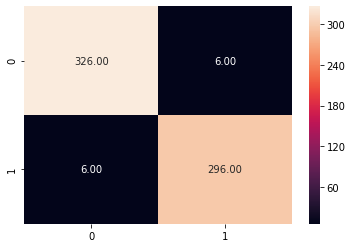

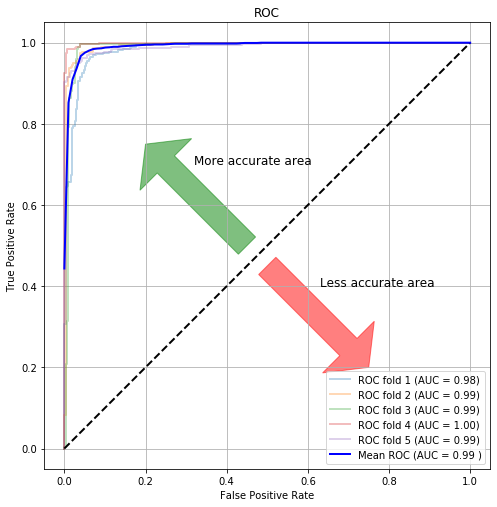

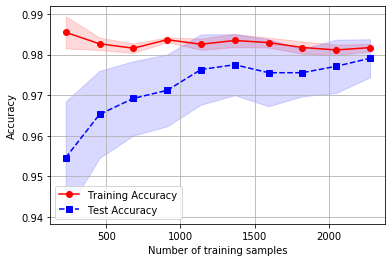

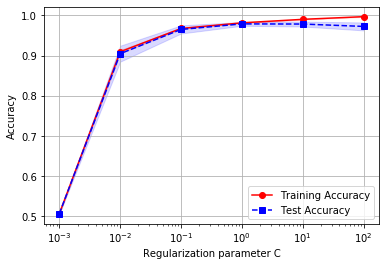

In [43]:
# Support vector machine
svm = SVC(probability=True).fit(trainX, train_labels)
print("Support Vector Machine\n-----------------------\n")
# print("Accuracy on training set: {:.3f}".format(svm.score(trainX, train_labels)))
# print("Accuracy on test set: {:.3f}".format(svm.score(testX, test_labels)))

testScore = svm.score(testX, test_labels)
trainScore = svm.score(trainX, train_labels)
sumary['SVC'] = {'Train Acc':trainScore, 'Test Acc':testScore}
print("Accuracy on training set: {:.3f}".format(trainScore))
print("Accuracy on test set: {:.3f}".format(testScore))

plot_confusion_matrix(testX, test_labels, svm)
# plot_feature_importances(svm, list(dataset.columns.drop('label')))
plot_roc_curves(svm, x, y) 
plot_learning_curve(svm, trainX, train_labels)
plot_validation_curve(svm, trainX, train_labels, 'C')

# sumary['SVC'] = {'Train Acc':svm.score(trainX, train_labels), 'Test Acc':svm.score(testX, test_labels)}

# save model
filename = 'saved_models/SVC.sav'
pickle.dump(svm, open(filename, 'wb'))

### 15.5 Neural Network (Sklearn)<a id=section1505></a>

Multilayer Perceptron
Accuracy on training set: 0.988
Accuracy on test set: 0.979
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       332
           1       0.98      0.98      0.98       302

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



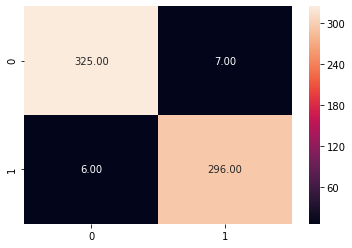

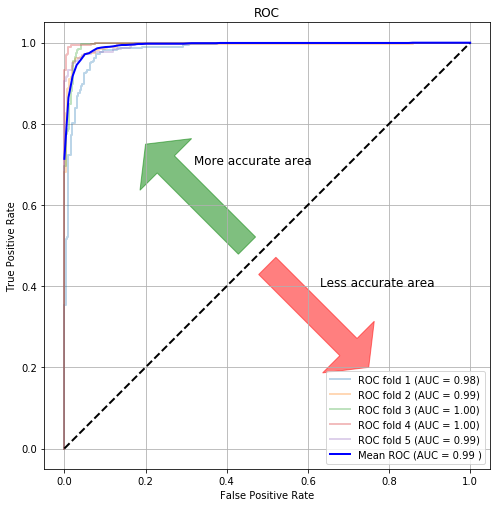

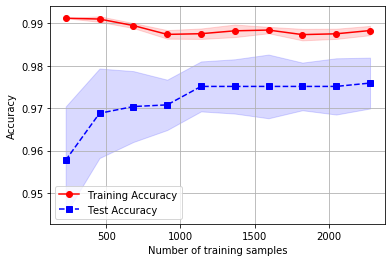

In [44]:
# Neural network model
mlp = MLPClassifier(random_state=0).fit(trainX, train_labels)
print("Multilayer Perceptron")
# print("Accuracy on training set: {:.3f}".format(mlp.score(trainX, train_labels)))
# print("Accuracy on test set: {:.3f}".format(mlp.score(testX, test_labels)))

testScore = mlp.score(testX, test_labels)
trainScore = mlp.score(trainX, train_labels)
sumary['MLPClassifier'] = {'Train Acc':trainScore, 'Test Acc':testScore}
print("Accuracy on training set: {:.3f}".format(trainScore))
print("Accuracy on test set: {:.3f}".format(testScore))

plot_confusion_matrix(testX, test_labels, mlp)
# plot_feature_importances(mlp, list(dataset.columns.drop('label')))
plot_roc_curves(mlp, x, y) 
plot_learning_curve(mlp, trainX, train_labels)
# plot_validation_curve(mlp, trainX, train_labels, 'hidden_layer_sizes')

# sumary['MLPClassifier'] = {'Train Acc':mlp.score(trainX, train_labels), 'Test Acc':mlp.score(testX, test_labels)}

# save model
filename = 'saved_models/MLPClassifier.sav'
pickle.dump(mlp, open(filename, 'wb'))

### 15.6 ROC Curve (all models) <a id=section1506></a>

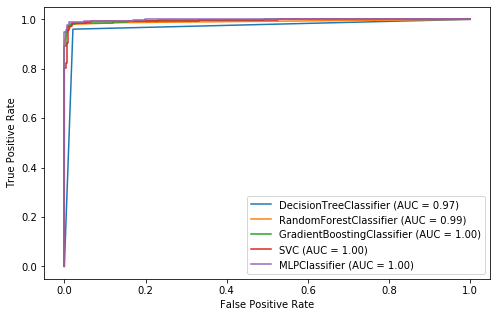

In [45]:
from sklearn.metrics import plot_roc_curve

fig, ax_ = plt.subplots(figsize=(8,5))
# disp = plot_roc_curve(tree, testX, test_labels)
# plot_roc_curve(forest, testX, test_labels, ax=disp.ax_);
plot_roc_curve(tree, testX, test_labels, ax=ax_)
plot_roc_curve(forest, testX, test_labels, ax=ax_);
plot_roc_curve(grboost, testX, test_labels, ax=ax_);
plot_roc_curve(svm, testX, test_labels, ax=ax_);
plot_roc_curve(mlp, testX, test_labels, ax=ax_);

### 15.7 Neural Network <a id=section1507></a>

### Vizualization of voice_data, X_data and Y_data
<img src="dataset.png" alt="dataset" border="0"></a>

### 3-Layer Artificial Neural Network (ANN) Construction
<img src="nn_network.png" alt="im2" border="0"></a>

### Cost function
* Loss and cost functions are same with logistic regression
* Cross entropy function
<img src="cost.jpg" alt="as" border="0"></a><br />

## Neural Network Model Implementation

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import sklearn
import sklearn.datasets
import sklearn.linear_model
import scipy.io

def sigmoid(x):
    """
    Compute the sigmoid of x
    """
    s = 1/(1+np.exp(-x))
    return s

def relu(x):
    """
    Compute the relu of x
    """
    s = np.maximum(0,x)    
    return s

def tanh(x):
    """
    Compute the tanh of x
    """
    s = np.tanh(x)    
    return s

def activation(x):
    s = tanh(x)
    return s

def initialize_parameters(layer_dims):
        
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

def forward_propagation(X, parameters):
    """
    Implements the forward propagation (and computes the loss) 
    """
        
    # retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3)
    
    return A3, cache

def backward_propagation(X, Y, cache):
    """
    Implement the backward propagation 
    """
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T)
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T)
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,
                 "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent 
    """
    
    n = len(parameters) // 2 # number of layers in the neural networks

    # Update rule for each parameter
    for k in range(n):
        parameters["W" + str(k+1)] = parameters["W" + str(k+1)] - learning_rate * grads["dW" + str(k+1)]
        parameters["b" + str(k+1)] = parameters["b" + str(k+1)] - learning_rate * grads["db" + str(k+1)]
        
    return parameters

def predict(X, y, parameters):
    """
    This function is used to predict the results of a  n-layer neural network.
    """
    m = X.shape[1]
    p = np.zeros((1,m), dtype = np.int)
    
    # Forward propagation
    a3, caches = forward_propagation(X, parameters)
    
    # convert probas to 0/1 predictions
    for i in range(0, a3.shape[1]):
        if a3[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0

    #print ("predictions: " + str(p[0,:]))
    #print ("true labels: " + str(y[0,:]))
    print("Accuracy: "  + str(np.mean((p[0,:] == y[0,:]))))
    
    return np.mean((p[0,:] == y[0,:]))

def compute_cost(a3, Y):
    """
    Implement the cost function
    """
    m = Y.shape[1]
    
    logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
    cost = 1./m * np.nansum(logprobs)
    
    return cost

def compute_cost_with_regularization(A3, Y, parameters, lambd):
    """
    Implement the cost function with L2 regularization. See formula (2) above.
    """
    m = Y.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    
    cross_entropy_cost = compute_cost(A3, Y) # This gives you the cross-entropy part of the cost    
    L2_regularization_cost = lambd * (np.sum(np.square(W1)) + np.sum(np.square(W2)) + np.sum(np.square(W3)))/(2*m)
    cost = cross_entropy_cost + L2_regularization_cost
    
    return cost

def backward_propagation_with_regularization(X, Y, cache, lambd):
    """
    Implements the backward propagation of our baseline model to which we added an L2 regularization.
    """
    
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    
    dW3 = 1./m * np.dot(dZ3, A2.T) + ((1/m)*(lambd * W3))
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T) + ((1/m)*(lambd * W2))
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T) + ((1/m)*(lambd * W1))
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

In [47]:

def model(X, Y, learning_rate = 0.3, num_iterations = 30000, print_cost = True, lambd = 0, keep_prob = 1):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    """
        
    grads = {}
    costs = []                            # to keep track of the cost
    m = X.shape[1]                        # number of examples
    layers_dims = [X.shape[0], 20, 3, 1]
    
    # Initialize parameters dictionary.
    parameters = initialize_parameters(layers_dims)

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        a3, cache = forward_propagation(X, parameters)
        
        # Cost function
        cost = compute_cost_with_regularization(a3, Y, parameters, lambd)
        
        grads = backward_propagation_with_regularization(X, Y, cache, lambd)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 10000 iterations
        if print_cost and i % 10000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)
    
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (x1,000)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.grid()
    plt.show()
    
    return parameters

Cost after iteration 0: 0.9771552619268955
Cost after iteration 10000: 0.056014917099614904
Cost after iteration 20000: 0.045005752346790495


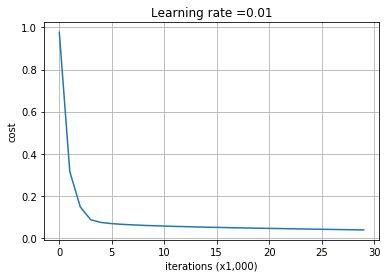

On the train set:
Accuracy: 0.985781990521327
On the test set:
Accuracy: 0.9747634069400631


In [48]:
# x = dataset.iloc[:,:-1].values
# y = dataset.iloc[:,-1].values

# scaler = StandardScaler()
# x = scaler.fit_transform(x)

# trainX, testX, train_labels, test_labels = train_test_split(x, y, test_size=0.2, random_state=42)

train_X = trainX.T
train_Y = train_labels.reshape(1,-1)
test_X = testX.T
test_Y = test_labels.reshape(1,-1)

parameters = model(train_X, train_Y, lambd = 0.1, learning_rate=0.01)
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)
plt.show()

sumary['3Layer_NN'] = {'Train Acc':predictions_train, 'Test Acc':predictions_test}

# save model
filename = 'saved_models/3Layer_NN.sav'
pickle.dump(mlp, open(filename, 'wb'))

In [49]:
pd.DataFrame(sumary).T

,Train Acc,Test Acc
DecisionTreeClassifier,1.000000,0.924290
RandomForestClassifier,0.996445,0.947950
GradientBoostingClassifier,0.991706,0.965300
SVC,0.982227,0.981073
MLPClassifier,0.988152,0.979495
3Layer_NN,0.985782,0.974763


- SVM clearly out performs all other models in train and test accuracies.
- Differece between the train and test accuracy is very low
- Accuracy curve for test increased constantly with no. of sample, which implies, no overftting.

## 16. Conclusion<a id=section16></a>
- Despite being trained on a publicly available training set, the model performs very well when guessing the gender of actual recordings of speech. 
- I tested the performance of the model on 8 genuine recordings of the utterance "hello" by two different speakers (1 male, 1 female). 
- The SVM correctly identified the gender in all 8 tests. 
- Where the SVM begins to show faults is when gender is impersonated. 
- On recordings where a female might pretend to sound like a male, the model consistently recognized the correct gender. 
- However, when males pretended to sound like females, the SVM was not as consistent. 
- Further testing must be done to give appropriate quantitative values. 
- Likewise, the SVM also fails to detect the gender of a child. 
    - This is most likely since the training data set only contained points from adults. 
    - A more diverse data set could solve this problem.

## 17. Live Demo <a id=section17></a>

In [50]:
import pyaudio
import wave
import os
import time
import platform

def live_demo_predict(input_val, parameters):           
    m = X.shape[1]
    p = np.zeros((1,m), dtype = np.int)
    
    # Forward propagation
    a3, caches = forward_propagation(input_val, parameters)
    
    # convert probas to 0/1 predictions
    for i in range(0, a3.shape[1]):
        if a3[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    return np.mean(p)

def record_audio():
    CHUNK = 1024
    FORMAT = pyaudio.paInt16
    CHANNELS = 2
    RATE = 44100
    RECORD_SECONDS = 5
    
    cwd = os.getcwd()

    WAVE_OUTPUT_FILENAME = os.path.join(cwd,'sounds','test_audio.wav')   #".\praat\test_audio.wav"

    p = pyaudio.PyAudio()

    stream = p.open(format=FORMAT,
                    channels=CHANNELS,
                    rate=RATE,
                    input=True,
                    frames_per_buffer=CHUNK)
    
    input('Speak for {} secs after pressing \'Enter\': '.format(RECORD_SECONDS))
    print('\nREAD NOW!')
    print('The weather is too hot today. I would rather stay indoor than going out.')
    time.sleep(.5)

    print("* recording")

    frames = []

    for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
        data = stream.read(CHUNK)
        frames.append(data)

    print("* done recording")

    stream.stop_stream()
    stream.close()
    p.terminate()

    wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
    wf.setnchannels(CHANNELS)
    wf.setsampwidth(p.get_sample_size(FORMAT))
    wf.setframerate(RATE)
    wf.writeframes(b''.join(frames))
    wf.close()
    
def plot_audioWave():
    wav_file = os.path.join(os.getcwd(),'sounds','test_audio.wav') #'praat/test_audio.wav'
    rate, data = wavfile.read(wav_file)

    time = np.arange(0, float(data.shape[0]), 1) / rate
    plt.figure(1, figsize=(20,9))
    plt.subplot(111)
    plt.plot(time, data, linewidth=0.1, alpha=0.9, color='teal') #
    plt.xlabel('Time (s)', fontsize=18)
    plt.ylabel('Amplitude', fontsize=18)
    plt.show()    

Speak for 5 secs after pressing 'Enter': 

READ NOW!
The weather is too hot today. I would rather stay indoor than going out.
* recording
* done recording


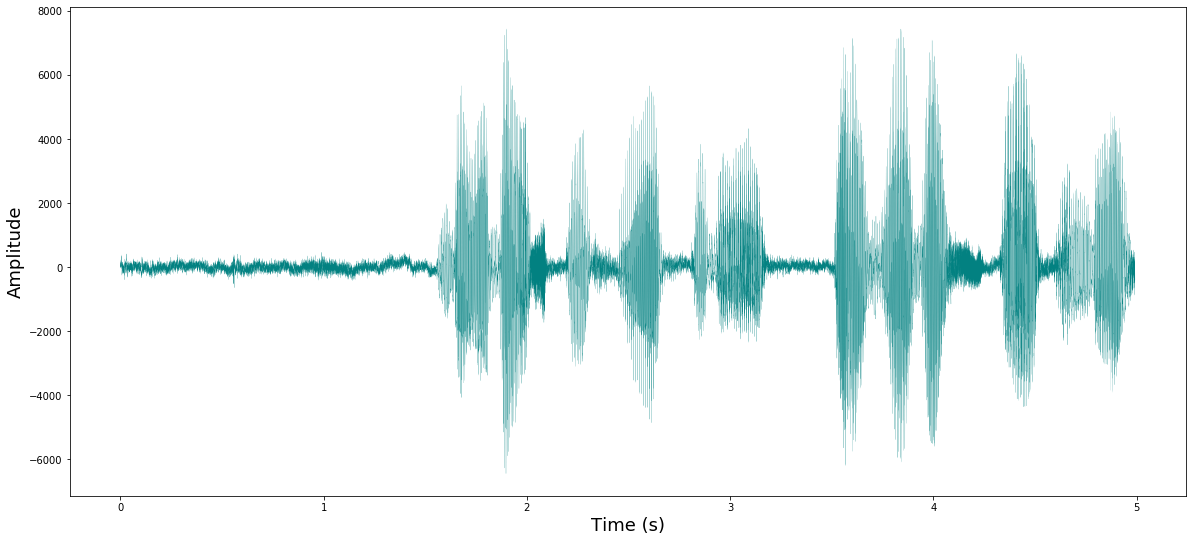

It's Male voice


In [59]:
from subprocess import run

record_audio()

# # running R script for extracting data from recorded voice
# print('Extracting features from audio files....')
# run(['C:/Program Files/R/R-4.0.0/bin/Rscript.exe', 'getAttributes.r', os.getcwd()])  
# print('Feature extraction : Done')

plot_audioWave()

data = pd.read_csv('output/voiceDetails.csv')
del data['peakf'], data['sound.files'], data['selec'], data['duration']

data = data[important_features]
# print(data.shape)

for i in range(len(data)):
    X = np.array(data.iloc[i]).reshape(1,-1)
    X = final_scaler.transform(X)
    X = pca.transform(X)
#     print( X.shape)
        
    ans = np.squeeze(svm.predict(X))    
#     ans = live_demo_predict(X.T, parameters)
    
    print('It\'s Female voice' if int(ans) == 1 else 'It\'s Male voice')
    
    # Plot audio wave
    

## 18. Appendix<a id=section18></a>

In [52]:
# record_audio()

# if platform.system() == 'Linux':
#     cmd = "{} --run {}".format(os.path.join(cwd,'praat','Praat'), 
#                                os.path.join(cwd,'praat','extract_freq_info.praat'))
# #     os.system('"./praat/Praat" --run ./praat/extract_freq_info.praat')
# elif platform.system() == 'Windows':
#     cmd = "{} --run {}".format(os.path.join(cwd,'praat','Praat.exe'), 
#                                os.path.join(cwd,'praat','extract_freq_info.praat'))
#     os.system(cmd)

# file = open(os.path.join(cwd,'praat','output.txt'), 'r')
    
# values = file.readline()
# values = values.split(', ')
# for x in range(0,3):
#     values[x] = float(values[x])/1000
    
# print(values)    
# wav_file = os.path.join(cwd,'praat','test_audio.wav') #'praat/test_audio.wav'
# rate, data = wavfile.read(wav_file)

# time = np.arange(0, float(data.shape[0]), 1) / rate
# plt.figure(1, figsize=(20,9))
# plt.subplot(111)
# plt.plot(time, data, linewidth=0.1, alpha=0.9, color='teal') #
# plt.xlabel('Time (s)', fontsize=18)
# plt.ylabel('Amplitude', fontsize=18)

# # X = np.array(values).reshape(-1, 1)
# # scaler = StandardScaler()
# # X = scaler.fit_transform(X)

# # live_demo_predict(X)

# val =svm.predict([values])
# print(np.squeeze(val))

In [53]:
record_audio()

Speak for 5 secs after pressing 'Enter': 

READ NOW!
The weather is too hot today. I would rather stay indoor than going out.
* recording
* done recording


In [54]:
from subprocess import run
run(['C:/Program Files/R/R-4.0.0/bin/Rscript.exe', 'getAttributes.r', os.getcwd()])  # running R script for extracting data from recorded voice

CompletedProcess(args=['C:/Program Files/R/R-4.0.0/bin/Rscript.exe', 'getAttributes.r', 'C:\\Users\\prata\\Google Drive\\Colab Notebooks\\GenderRecognitionByVoiceAndSpeechAnalysis'], returncode=0)

In [55]:
data = pd.read_csv('output/voiceDetails.csv')
del data['peakf'], data['sound.files'], data['selec'], data['duration']
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.182562,0.058105,0.184527,0.158052,0.212006,0.053954,2.471812,10.198195,0.922868,0.505436,0.18192,0.182562,0.119551,0.043363,0.273913,0.390582,0,3.574512,3.574512,0.049531


In [56]:
np.array(data.iloc[0]).reshape(1,-1)

array([[ 0.18256201,  0.05810484,  0.18452722,  0.15805158,  0.21200573,
         0.05395415,  2.47181204, 10.19819469,  0.92286845,  0.50543556,
         0.18191977,  0.18256201,  0.11955135,  0.04336283,  0.27391304,
         0.39058246,  0.        ,  3.57451172,  3.57451172,  0.04953146]])